# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [73]:
import pandas as pd
import json
from api_keys import weather_api_key
import requests
import matplotlib.pyplot as plt
import random
from scipy.stats import linregress 


## Generate Cities List

In [2]:
#downloaded and decompressed gzip file from openweather map of a list of all documented citied  
# in order to get a random list of 500 city IDs. 

#reading in the json file
df_city_list = pd.read_json("../city.list.json")
df_city_list

#creating a list of city IDs from the "id" column
list_df_id = list(df_city_list["id"])

#creating a random list of city IDs
city_id_list = random.sample(list_df_id,1000)

city_id_list

[478996,
 6127586,
 4922267,
 6432673,
 320700,
 616620,
 791954,
 70221,
 6358402,
 5951878,
 2891352,
 7628333,
 662518,
 3066220,
 2782979,
 7530729,
 1254842,
 2918646,
 2522183,
 2864707,
 5791896,
 6438450,
 7602866,
 2981615,
 6357508,
 6434285,
 934967,
 6439774,
 2033557,
 1279812,
 4871875,
 6551606,
 652578,
 7038876,
 1910138,
 2958496,
 668656,
 2969806,
 2775327,
 3030090,
 3436534,
 6362822,
 2053173,
 1805280,
 6554188,
 7286315,
 6361820,
 7772124,
 6979981,
 2808275,
 553937,
 984896,
 577403,
 1528253,
 6434434,
 6284855,
 2597363,
 7232363,
 6552230,
 2792196,
 6533982,
 6616918,
 1269834,
 4580391,
 4727873,
 534839,
 6362585,
 3844585,
 1271107,
 1274284,
 5151278,
 1091996,
 6441085,
 1260482,
 5128465,
 1798402,
 2904789,
 2163046,
 6424741,
 2660865,
 1343000,
 2960777,
 857667,
 3170023,
 3712164,
 4026072,
 2987428,
 684610,
 5164916,
 3203090,
 2878234,
 3630089,
 3128865,
 1725841,
 1812896,
 3465671,
 7005616,
 2887637,
 2155737,
 6355724,
 6439849,
 78729

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#creating an empty list for city weather data
weather_json_data = []

In [4]:
print("Beginning Data Retrieval")

print("_____________________________________________________")

for city_id in city_id_list:
    url = f"http://api.openweathermap.org/data/2.5/weather?id={city_id}&appid={weather_api_key}"
    json_request = requests.get(url).json()
    city_name = json_request["name"]
    
    weather_json_data.append(json_request)
    
    
    print(f"Retrieving data for {city_name} (city ID {city_id}).")

Beginning Data Retrieval
_____________________________________________________
Retrieving data for Uni (city ID 478996).
Retrieving data for Rosedale (city ID 6127586).
Retrieving data for Kentland (city ID 4922267).
Retrieving data for Vailhauquès (city ID 6432673).
Retrieving data for Tenedos (city ID 320700).
Retrieving data for Shahumyan (city ID 616620).
Retrieving data for Češinovo (city ID 791954).
Retrieving data for At Ta'izziyah (city ID 70221).
Retrieving data for Sahún (city ID 6358402).
Retrieving data for Fawcett (city ID 5951878).
Retrieving data for Kestert (city ID 2891352).
Retrieving data for Jaunjelgava (city ID 7628333).
Retrieving data for Voineşti (city ID 662518).
Retrieving data for Semily (city ID 3066220).
Retrieving data for Admont (city ID 2782979).
Retrieving data for Chełm (city ID 7530729).
Retrieving data for Tāttayyangārpettai (city ID 1254842).
Retrieving data for Gotthun (city ID 2918646).
Retrieving data for Alburquerque (city ID 2522183).
Retrievin

Retrieving data for North Vancouver (city ID 6090786).
Retrieving data for Cochabamba (city ID 3919968).
Retrieving data for Gan (city ID 3016726).
Retrieving data for Wehrheim (city ID 6553182).
Retrieving data for Didyme (city ID 5939211).
Retrieving data for McLean (city ID 4901730).
Retrieving data for Gruta (city ID 3098204).
Retrieving data for Dusun Desa Handapherang (city ID 8053694).
Retrieving data for Miyagi (city ID 2111888).
Retrieving data for Ludeşti (city ID 674550).
Retrieving data for Qala (city ID 2562655).
Retrieving data for Babo-Pangulo (city ID 1729734).
Retrieving data for Hagetaubin (city ID 6440407).
Retrieving data for Arauzo de Salce (city ID 3129829).
Retrieving data for Lenape Heights (city ID 5197732).
Retrieving data for Covington (city ID 4754358).
Retrieving data for Roquecor (city ID 6445025).
Retrieving data for Neuilly-Saint-Front (city ID 2990615).
Retrieving data for Ferschweiler (city ID 2927083).
Retrieving data for Prinzenmoor (city ID 6551904)

Retrieving data for Chabang Wahid (city ID 6804725).
Retrieving data for Saint-Quentin-sur-Sauxillanges (city ID 2977259).
Retrieving data for Kondangrege (city ID 7916197).
Retrieving data for Hotonj (city ID 3268187).
Retrieving data for Goczałkowice Zdrój (city ID 3099095).
Retrieving data for Codeso (city ID 3124882).
Retrieving data for Brăneşti (city ID 683886).
Retrieving data for Balugo (city ID 1727760).
Retrieving data for Salares (city ID 2511547).
Retrieving data for Camporrobles (city ID 6361945).
Retrieving data for Province of Negros Occidental (city ID 1697808).
Retrieving data for Itajubá (city ID 3460834).
Retrieving data for Nashdale (city ID 2155695).
Retrieving data for Singtam (city ID 1256126).
Retrieving data for Al Muzayri‘ah (city ID 166507).
Retrieving data for San Felipe (city ID 3872255).
Retrieving data for Viby (city ID 2610311).
Retrieving data for Santana do Itararé (city ID 3449938).
Retrieving data for Sydney River (city ID 6160771).
Retrieving data f

Retrieving data for Appignano (city ID 3182963).
Retrieving data for San Pedro Comitancillo (city ID 3530369).
Retrieving data for Livo (city ID 3174661).
Retrieving data for Sumberingin Kulon (city ID 7034510).
Retrieving data for Melrand (city ID 2994653).
Retrieving data for Yigou (city ID 1786720).
Retrieving data for Vesly (city ID 6435700).
Retrieving data for Valga (city ID 3106702).
Retrieving data for Requejo (city ID 3111990).
Retrieving data for Alpeñés (city ID 6361445).
Retrieving data for Oberzelg (city ID 2659318).
Retrieving data for Oberglaucha (city ID 2860611).
Retrieving data for Kunice (city ID 3094260).
Retrieving data for Landiras (city ID 3007845).
Retrieving data for Acaiaca (city ID 3473220).
Retrieving data for Plogastel-Saint-Germain (city ID 2986725).
Retrieving data for Croissy-sur-Seine (city ID 3022380).
Retrieving data for Voldynskoye (city ID 472794).
Retrieving data for Youxikou (city ID 1916753).
Retrieving data for Port de Pollença (city ID 6355021)

Retrieving data for Gmina Końskie (city ID 768218).
Retrieving data for Antwerp Province (city ID 2803136).
Retrieving data for Gubukjero Timuk (city ID 7377150).
Retrieving data for Boeschepe (city ID 3032146).
Retrieving data for Tifni (city ID 2528650).
Retrieving data for Posses (city ID 3452584).
Retrieving data for Gemeente Gouda (city ID 2755419).
Retrieving data for Aubertin (city ID 3036392).
Retrieving data for Cranley (city ID 2170070).
Retrieving data for Jūrokuban (city ID 1860941).
Retrieving data for San Patricio (city ID 3437029).
Retrieving data for Al ‘Arīsh (city ID 361546).
Retrieving data for Hopfgarten (city ID 2899194).
Retrieving data for Gainsborough (city ID 5959003).
Retrieving data for Greppen (city ID 2660509).
Retrieving data for Sinamaica (city ID 3626809).
Retrieving data for Baimu (city ID 7690166).
Retrieving data for Victoria (city ID 4022970).
Retrieving data for Wewoka (city ID 4555211).
Retrieving data for Riley Creek (city ID 6943490).
Retrieving 

Retrieving data for Pennabilli (city ID 3171254).
Retrieving data for Novoivanovka (city ID 801996).
Retrieving data for Borovan (city ID 733057).
Retrieving data for Oromocto (city ID 6094407).
Retrieving data for Virginia (city ID 2059436).
Retrieving data for Untervilslern (city ID 2818502).
Retrieving data for Dayr al Ghuşūn (city ID 284100).
Retrieving data for Mihăileni (city ID 673393).
Retrieving data for Suicheng (city ID 1793899).
Retrieving data for Sankt Peter (city ID 2841487).
Retrieving data for Dilke (city ID 5939355).
Retrieving data for Yong’an (city ID 1811120).
Retrieving data for La Pipa (city ID 3119226).
Retrieving data for Cwm (city ID 2651659).
Retrieving data for Shrewsbury (city ID 5104638).
Retrieving data for Saint James City (city ID 4171061).
Retrieving data for Le Brévedent (city ID 3004982).
Retrieving data for Barengkok (city ID 8021023).
Retrieving data for Herzele (city ID 2795908).
Retrieving data for Gunungbatu (city ID 8023783).
Retrieving data fo

Retrieving data for Dhing (city ID 1272768).
Retrieving data for Iloilo City (city ID 1711003).
Retrieving data for Mzimba District (city ID 925496).
Retrieving data for Ćićevac (city ID 791936).
Retrieving data for Ruppertsberg (city ID 2842981).
Retrieving data for La Yeguera (city ID 3634833).
Retrieving data for Akulovo (city ID 583526).
Retrieving data for Dong Ostang (city ID 1281307).
Retrieving data for Selk (city ID 6551994).
Retrieving data for Kleinlangenfeld (city ID 6554558).
Retrieving data for Puchi (city ID 7338243).
Retrieving data for Bilice (city ID 3204156).
Retrieving data for Marratxí (city ID 2514097).


In [5]:
#checking if data has been appended to list
print(json.dumps(weather_json_data[0], indent = 4), len(weather_json_data))

{
    "coord": {
        "lon": 51.4923,
        "lat": 57.7535
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 246.74,
        "feels_like": 240.81,
        "temp_min": 246.74,
        "temp_max": 246.74,
        "pressure": 1034,
        "humidity": 89,
        "sea_level": 1034,
        "grnd_level": 1007
    },
    "visibility": 5776,
    "wind": {
        "speed": 3.06,
        "deg": 104
    },
    "clouds": {
        "all": 90
    },
    "dt": 1610513462,
    "sys": {
        "country": "RU",
        "sunrise": 1610514497,
        "sunset": 1610540201
    },
    "timezone": 10800,
    "id": 478996,
    "name": "Uni",
    "cod": 200
} 1000


In [6]:
#city 
weather_json_data[0]["name"]
#lat
weather_json_data[0]["coord"]["lat"]
#long
weather_json_data[0]["coord"]["lon"]
#max_temp
weather_json_data[0]["main"]["temp_max"]
#humidity
weather_json_data[0]["main"]["humidity"]
#cloudiness
weather_json_data[0]["clouds"]["all"]
#wind_speed
weather_json_data[0]["wind"]["speed"]
#country
weather_json_data[0]["sys"]["country"]
#date
weather_json_data[0]["sys"]["sunrise"]

1610514497

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for json_data in weather_json_data:
    city.append(json_data["name"])
    lat.append(json_data["coord"]["lat"])
    lng.append(json_data["coord"]["lon"])
    max_temp.append(json_data["main"]["temp_max"])
    humidity.append(json_data["main"]["humidity"])
    cloudiness.append(json_data["clouds"]["all"])
    wind_speed.append(json_data["wind"]["speed"])
    country.append(json_data["sys"]["country"])
    date.append(json_data["sys"]["sunrise"])
    

In [8]:
#converting kelvin to celcius
max_temp_celcius = [x - 273.15 for x in max_temp]
max_temp_celcius

[-26.409999999999968,
 7.0,
 0.5600000000000023,
 10.0,
 7.0,
 -3.0,
 0.0,
 17.33000000000004,
 0.5600000000000023,
 -12.0,
 0.5600000000000023,
 -1.669999999999959,
 -1.0,
 -2.2199999999999704,
 1.1100000000000136,
 -2.2199999999999704,
 24.0,
 1.1100000000000136,
 -1.2799999999999727,
 1.1100000000000136,
 15.0,
 1.670000000000016,
 17.710000000000036,
 1.1100000000000136,
 -2.909999999999968,
 7.220000000000027,
 25.0,
 1.1100000000000136,
 -3.339999999999975,
 -2.819999999999993,
 0.0,
 1.670000000000016,
 -6.0,
 28.0,
 14.330000000000041,
 0.0,
 0.0,
 4.0,
 2.0,
 5.0,
 23.0,
 5.560000000000002,
 -3.9899999999999523,
 9.770000000000039,
 0.0,
 2.2200000000000273,
 -4.439999999999998,
 23.33000000000004,
 -3.75,
 2.2200000000000273,
 -22.73999999999998,
 26.670000000000016,
 -3.0,
 -0.2699999999999818,
 5.0,
 -4.0,
 17.310000000000002,
 -1.0,
 2.2200000000000273,
 2.7800000000000296,
 5.0,
 9.0,
 26.370000000000005,
 7.78000000000003,
 6.110000000000014,
 -7.310000000000002,
 0.5600

In [9]:
city_weather_info_df = pd.DataFrame({"City":city, "Lat":lat, "Lng":lng, "Max Temp (C)":max_temp_celcius, "Humidity":humidity, "Cloudiness":cloudiness,
    "Wind Speed":wind_speed, "Country":country, "Date":date 
    
})

city_weather_info_df

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,Uni,57.7535,51.4923,-26.41,89,90,3.06,RU,1610514497
1,Rosedale,51.4168,-112.6352,7.00,53,74,1.03,CA,1610465459
2,Kentland,40.7703,-87.4453,0.56,88,62,1.34,US,1610457163
3,Vailhauquès,43.6667,3.7167,10.00,66,0,10.29,FR,1610522185
4,Tenedos,39.8350,26.0697,7.00,87,75,6.69,TR,1610516151
...,...,...,...,...,...,...,...,...,...
995,Selk,54.4667,9.5667,1.67,93,45,6.69,DE,1610523386
996,Kleinlangenfeld,50.2667,6.4833,-1.00,93,90,3.71,DE,1610522945
997,Puchi,33.5347,104.8142,8.29,35,0,1.30,CN,1610496313
998,Bilice,45.2367,17.8411,-1.67,85,80,1.34,HR,1610519099


In [74]:
#creating csv file of dataframe 
city_weather_info_df.to_csv("../output_data/city_weather_info_csv", index=False)

In [32]:
#Dataframe stats
city_weather_stats = city_weather_info_df.describe()
city_weather_stats

#creating csv file of dataframe 
city_weather_stats.to_csv("../output_data/city_weather_stats_csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_info_df.loc[city_weather_info_df["Humidity"] < 100, :]
clean_city_data

#creating csv file of dataframe 
clean_city_data.to_csv("../output_data/clean_city_data")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

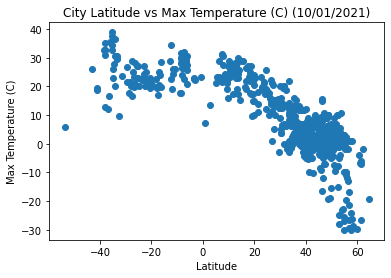

In [34]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max Temp (C)"]

plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("City Latitude vs Max Temperature (C) (10/01/2021)")


plt.scatter(x_axis, y_axis)


plt.savefig("../output_data/lat_vs_temp_scttr")
plt.show()

- This scatter plot is displaying the relationship between the maximum temperature of a city and its latitude. 
- From negative x values (latitude) to zero the temperature increases since the points are getting closer to the equator. 
- As the points move further positive along the x axis (moving away from the equator), the temperature decreases. 

## Latitude vs. Humidity Plot

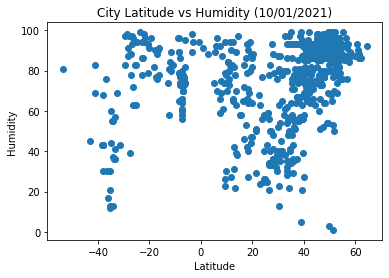

In [35]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Humidity"]

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("City Latitude vs Humidity (10/01/2021)")


plt.scatter(x_axis, y_axis)

plt.savefig("../output_data/lat_vs_humidity_scttr")
plt.show()

- There does not seem to be an obvious correlation between the location of cities and humidty. 
- This may suggest that a city's humidity is independent from its location. 

## Latitude vs. Cloudiness Plot

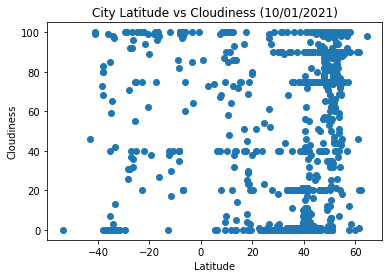

In [36]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("City Latitude vs Cloudiness (10/01/2021)")


plt.scatter(x_axis, y_axis)

plt.savefig("../output_data/lat_vs_cloudiness_scttr")
plt.show()

- Similarly to the Latitude vs Humidity plot, there does not seem to be an obvious correlation
- This may suggest that cloudiness is independent from a city's location.

## Latitude vs. Wind Speed Plot

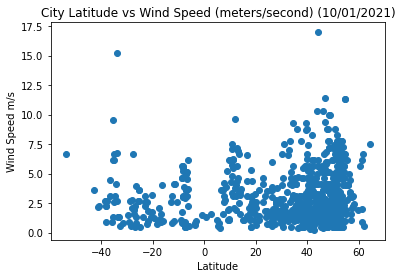

In [37]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]

plt.ylabel("Wind Speed m/s")
plt.xlabel("Latitude")
plt.title("City Latitude vs Wind Speed (meters/second) (10/01/2021)")


plt.scatter(x_axis, y_axis)

plt.savefig("../output_data/lat_vs_windspeed_scttr")
plt.show()

- This scatter plot shows the relationship between wind speed and a city's latitude.
- There is no obvious correlation which may suggest that they are independent of each other, and there seem to be one outlier around the -40 and 40 latitudes.

# Linear Regression

In [18]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

##  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [41]:
#filtering data for lat > 0
lat_0_greater_df = clean_city_data.loc[clean_city_data["Lat"] > 0, :]
lat_0_greater_df
#creating csv file of dataframe 
lat_0_greater_df.to_csv("../output_data/cities_lat_greater_0_csv")

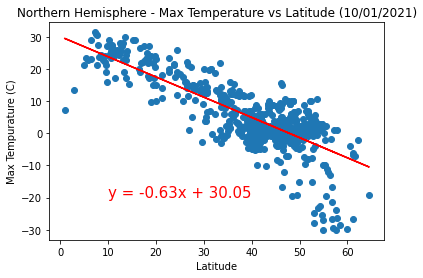

In [53]:
x_axis = lat_0_greater_df["Lat"]
y_axis = lat_0_greater_df["Max Temp (C)"]

#plotting scatter plot
plt.ylabel("Max Tempurature (C)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Max Temperature vs Latitude (10/01/2021)")

#regression values
(slope, intercept, rvalue_1a, pvalue, stderr) = linregress(x_axis, y_axis)
#linear equation
y_regr_values = slope*x_axis + intercept
plt.plot(x_axis,y_regr_values, "r-")
#displaying regression line equation
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
plt.annotate(line_eq, (10,-20), fontsize = 15, color = "red")

plt.scatter(x_axis, y_axis)

plt.show()

In [ ]:
plt.savefig("../output_data/nrthrn_temp_vs_lat_scttr")

#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
#filtering data for lat < 0
lat_0_lesser_df = clean_city_data.loc[clean_city_data["Lat"] < 0, :]
lat_0_lesser_df
#creating csv file of dataframe 
lat_0_lesser_df.to_csv("../output_data/cities_lat_lesser_0_csv")

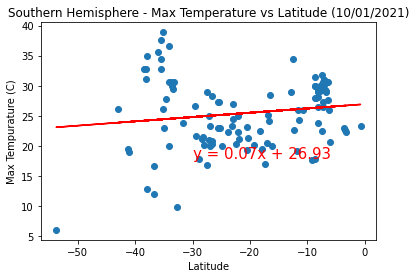

In [54]:
x_axis = lat_0_lesser_df["Lat"]
y_axis = lat_0_lesser_df["Max Temp (C)"]

#plotting scatter plot
plt.ylabel("Max Tempurature (C)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Max Temperature vs Latitude (10/01/2021)")

#regression values
(slope, intercept, rvalue_1b, pvalue, stderr) = linregress(x_axis, y_axis)

#linear equation
y_regr_values = slope*x_axis + intercept
plt.plot(x_axis,y_regr_values, "r-")

#displaying regression line equation
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
plt.annotate(line_eq, (-30,18), fontsize = 15, color = "red")

plt.scatter(x_axis, y_axis)

plt.show()

In [ ]:
plt.savefig("../output_data/sthrn_temp_vs_lat_scttr")

In [62]:
print(rvalue_1a, rvalue_1b)

-0.7887410497136845 0.15022313484081132


### Northern/Southern Hemisphere - Max Temp vs. Latitude plots analysis
- It can be seen, in the scatter plot for the northern hemisphere, that as cities are further away from the equator, the lower the max temperature becomes. There is a negative correlation between max temperature and latitude in the northern hemiphere.

- The opposite can be somewhat observed in the southern hemisphere. The line of regression shows that as cities approach the equator (towards 0 latitude) the max temperature increases, and it can be said that there is a positive correlation between max temperature and latitude in the southern hemisphere.

- The r value for the northern hemisphere plot is -0.79, which suggest that there is a fairly strong negative correlation. 
- The r value for the southern hemisphere plot is 0.15. This suggest that there is a very weak positive correlation, as seen in the sparse distribution of individual points.

#  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

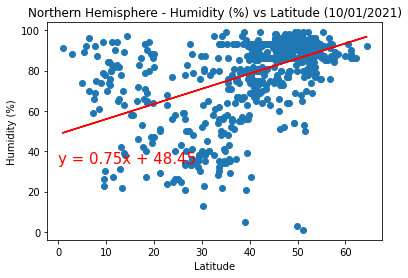

In [55]:
x_axis = lat_0_greater_df["Lat"]
y_axis = lat_0_greater_df["Humidity"]

#plotting scatter plot
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Humidity (%) vs Latitude (10/01/2021)")

#regression values
(slope, intercept, rvalue_2a, pvalue, stderr) = linregress(x_axis, y_axis)
#linear equation
y_regr_values = slope*x_axis + intercept
plt.plot(x_axis,y_regr_values, "r-")
#displaying regression line equation
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
plt.annotate(line_eq, (0,34), fontsize = 15, color = "red")

plt.scatter(x_axis, y_axis)

plt.show()

In [ ]:
plt.savefig("../output_data/nrthrn_humid_vs_lat_scttr")

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

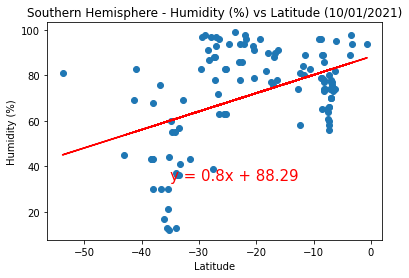

In [56]:
x_axis = lat_0_lesser_df["Lat"]
y_axis = lat_0_lesser_df["Humidity"]

#plotting scatter plot
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Humidity (%) vs Latitude (10/01/2021)")

#regression values
(slope, intercept, rvalue_2b, pvalue, stderr) = linregress(x_axis, y_axis)
#linear equation
y_regr_values = slope*x_axis + intercept
plt.plot(x_axis,y_regr_values, "r-")
#displaying regression line equation
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
plt.annotate(line_eq, (-35,34), fontsize = 15, color = "red")

plt.scatter(x_axis, y_axis)

plt.show()

In [ ]:
plt.savefig("../output_data/sthrn_humid_vs_lat_scttr")

In [68]:
print(rvalue_2a, rvalue_2b)

0.48250577208710393 0.4536960093166779


## Northern/Southern Hemisphere - Humidity (%) vs. Latitude scatter plot analysis 
- Both plots of humidity vs latitude have a positive correlation as shown with the regression lines with r values for both plots just under 0.5. The positive linear correlation isn't particularly strong as seen in how sparse the data points are from each other. 
- The regression lines suggest that as the cities are located further north humidity increases, however as stated previously, the sparse nature of the data points show that the correlation is not strong. 
- There are inconsistencies in the predicted humidity in relation to latitude. The y intercept for the southern hemisphere regression line is 88.29 (humidity of 88% at latitude 0), while the y intercept for the northern regression line is 48.45 (humidity of 48.45% at latitude 0)


#  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

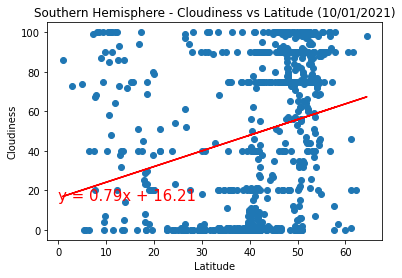

In [57]:
x_axis = lat_0_greater_df["Lat"]
y_axis = lat_0_greater_df["Cloudiness"]

#plotting scatter plot
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Cloudiness vs Latitude (10/01/2021)")

#regression values
(slope, intercept, rvalue_3a, pvalue, stderr) = linregress(x_axis, y_axis)
#linear equation
y_regr_values = slope*x_axis + intercept
plt.plot(x_axis,y_regr_values, "r-")
#displaying regression line equation
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
plt.annotate(line_eq, (0,15), fontsize = 15, color = "red")

plt.scatter(x_axis, y_axis)

plt.show()

In [ ]:
plt.savefig("../output_data/nrthrn_cloud_vs_lat_scttr")

#  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

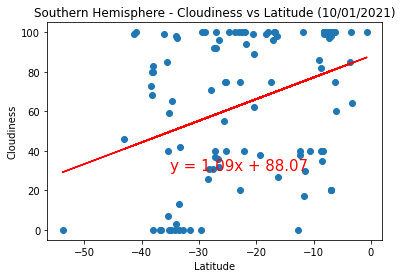

In [58]:
x_axis = lat_0_lesser_df["Lat"]
y_axis = lat_0_lesser_df["Cloudiness"]

#plotting scatter plot
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Cloudiness vs Latitude (10/01/2021)")

#regression values
(slope, intercept, rvalue_3b, pvalue, stderr) = linregress(x_axis, y_axis)
#linear equation
y_regr_values = slope*x_axis + intercept
plt.plot(x_axis,y_regr_values, "r-")
#displaying regression line equation
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
plt.annotate(line_eq, (-35,30), fontsize = 15, color = "red")

plt.scatter(x_axis, y_axis)

plt.show()

In [ ]:
plt.savefig("../output_data/sthrn_cloud_vs_lat_scttr")

In [67]:
print(rvalue_3a, rvalue_3b)

0.250069724527696 0.36538739977087953


In [69]:
print(pvalue)

0.018145730377819573


#  Cloudiness (%) vs. Latitude scatter plot analysis
- The regression lines for the northern and southern plots is 0.25 and 0.36 respectively. In both cases, the r values suggest a weak positive linear relationship between cloudiness and latitude.
- This weak linear relationship may mean that cloudiness of a city is not affected by it latitudinal position. 
- The inconsistency in predicted level of cloudiness can be shown at latitude 0 for the southern plot (88.07) and the northern plot(16.21), which demonstrates the weak correlation between the two factors. 

#  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

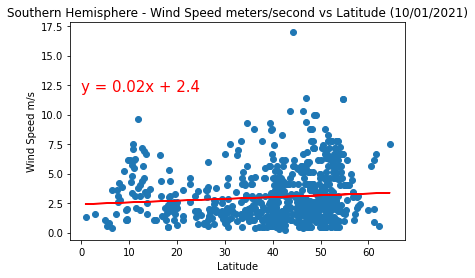

In [70]:
x_axis = lat_0_greater_df["Lat"]
y_axis = lat_0_greater_df["Wind Speed"]

#plotting scatter plot
plt.ylabel("Wind Speed m/s")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Wind Speed meters/second vs Latitude (10/01/2021)")

#regression values
(slope, intercept, rvalue_4a, pvalue_a, stderr) = linregress(x_axis, y_axis)
#linear equation
y_regr_values = slope*x_axis + intercept
plt.plot(x_axis,y_regr_values, "r-")
#displaying regression line equation
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
plt.annotate(line_eq, (0,12), fontsize = 15, color = "red")

plt.scatter(x_axis, y_axis)

plt.show()

In [ ]:
plt.savefig("../output_data/nrthrn_wind_vs_lat_scttr")

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

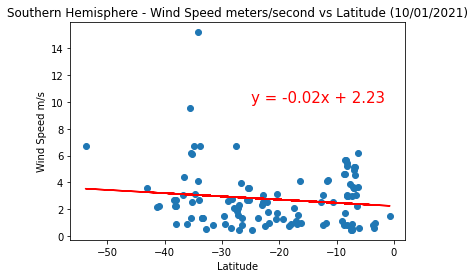

In [71]:
x_axis = lat_0_lesser_df["Lat"]
y_axis = lat_0_lesser_df["Wind Speed"]

#plotting scatter plot
plt.ylabel("Wind Speed m/s")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Wind Speed meters/second vs Latitude (10/01/2021)")

#regression values
(slope, intercept, rvalue_4b, pvalue_b, stderr) = linregress(x_axis, y_axis)
#linear equation
y_regr_values = slope*x_axis + intercept
plt.plot(x_axis,y_regr_values, "r-")
#displaying regression line equation
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
plt.annotate(line_eq, (-25,10), fontsize = 15, color = "red")

plt.scatter(x_axis, y_axis)

plt.show()

In [ ]:
plt.savefig("../output_data/sthrn_wind_vs_lat_scttr")

In [66]:
print(rvalue_4a, rvalue_4b)

0.08496172618318497 -0.1355676011269945


In [72]:
print(pvalue_a, pvalue_b)

0.018145730377819573 0.14857113491479418


# Wind Speed (mph) vs. Latitude scatter plot analysis
- With a r value of 0.08 and -0.16 of the northern and southern plots respectively, there is almost no linear correlation between wind speeds and the latitudinal position of a city. 
- The p value for the northern hemisphere plot is 0.018, which means that the weak correlation shown is statistically significant. 
- The p value for the southern hemisphere plot is 0.14, which suggests that the weak correlation bewteen wind speed and latitude is due to chance. This p value may be a result of a lack of sufficient data of cities in the southern hemisphere. 
- There are more cities in the northern hemisphere than in the southern hemisphere as there is more land mass in the northern hemisphere. As a random list of 1000 cities were selected, the chance that a city from the nothern hemiphere is added to the list is much greater than the chance of a city from the southern hemisphere is added. 